# EDA

See a comperhansive overview and details on this dataset [here](https://www.kaggle.com/ajay1735/hmeq-data).

In this stage of The Project, the data will be explored using commonly used methods in the folowing steps:

1. **Basic Data Exploration** - Check what the data set comprises of in terms of:
    * Shape of the dataset.
    * Data Types, missing values outliers.
    * Inconsistencies (e.g. "Mr" vs "mr.").
    * Visualizations.
    * Etc.
2. **Reshaping Data** - changing the data:
    * Handeling duplications/invalid entries/outliers.
    * Data transformations.
    * Feature engineering.
    * Etc.
    
    
 
## Basic Data Exploration

Before begining the analysis the data will be split to avoid data leakage.
First the data will split to inputes and targets, and then to the Train and Test sets, and then split the training data to the validation set.
The data is small so a cross validation is needed to be representative enough to the data's actual distribution and bias and prevent overfitting.

In [1]:
import pandas as pd
import cufflinks as cf; cf.go_offline()
df = pd.read_csv("Data/hmeq.csv")
df.shape

(5960, 13)

In [2]:
df.sample(3)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
2267,1,13900,77699.0,92587.0,DebtCon,Other,13.0,0.0,2.0,134.633579,0.0,36.0,39.196149
2318,1,14000,139000.0,159000.0,DebtCon,Mgr,13.0,0.0,1.0,171.433333,1.0,32.0,NaN
2131,1,13300,25698.0,58760.0,HomeImp,Self,15.0,0.0,0.0,147.910982,1.0,10.0,30.962077


In [3]:
from sklearn.model_selection import train_test_split
X = df.drop("BAD", axis = 1)
y = df["BAD"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.25) # 25% of 80% is 20%
print(f"Train set: X_train size: {X_train2.shape}, X_train size: {y_train2.shape}")
print(f"Cross val set: X_train size: {X_val.shape}, X_train size: {y_val.shape}")
print(f"test set: X_train size: {X_test.shape}, X_train size: {y_test.shape}")

Train set: X_train size: (3576, 12), X_train size: (3576,)
Cross val set: X_train size: (1192, 12), X_train size: (1192,)
test set: X_train size: (1192, 12), X_train size: (1192,)


In [4]:
Train = X_train2.copy()
Train["BAD"] = y_train2
Train.sample(3)# display how the data looks after prep

,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,BAD
3374,17900,46342.0,68029.0,DebtCon,Mgr,26.0,1.0,0.0,279.007081,1.0,17.0,36.072975,0
1266,10200,NaN,64377.0,HomeImp,Other,NaN,0.0,0.0,347.245013,0.0,6.0,37.774682,0
2755,15500,25751.0,43531.0,NaN,Office,0.0,0.0,0.0,213.359282,0.0,16.0,37.794992,0


In [5]:
#cv set
Cross_val = X_val.copy()
Cross_val["BAD"] = y_val

#test set
Test = X_test.copy()
Test["BAD"] = y_test

print(f"Train set shape: {Train.shape}, Cross val set shape: {Cross_val.shape}, Test set shape: {Test.shape}")


Train set shape: (3576, 13), Cross val set shape: (1192, 13), Test set shape: (1192, 13)


Now the data is split to 3 sets:

* **Training:** 60%

* **Cross validation:** 20%

* **Testing:** 20%

Now the main focus will be on the train set

## Basic Data Exploration

Here we will try to better understand the data:

In [6]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3576 entries, 5837 to 3645
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   LOAN     3576 non-null   int64  
 1   MORTDUE  3258 non-null   float64
 2   VALUE    3506 non-null   float64
 3   REASON   3423 non-null   object 
 4   JOB      3413 non-null   object 
 5   YOJ      3270 non-null   float64
 6   DEROG    3160 non-null   float64
 7   DELINQ   3227 non-null   float64
 8   CLAGE    3392 non-null   float64
 9   NINQ     3273 non-null   float64
 10  CLNO     3448 non-null   float64
 11  DEBTINC  2815 non-null   float64
 12  BAD      3576 non-null   int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 391.1+ KB


It seems the data has null columns, numeric and categoric data types.

Let's see how much data is missing for all columns:

In [7]:
#missing data
total = Train.isnull().sum().sort_values(ascending=False)
percent = round(Train.isnull().sum()/Train.shape[0]*100,2).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
DEBTINC,761,21.28
DEROG,416,11.63
DELINQ,349,9.76
MORTDUE,318,8.89
YOJ,306,8.56
NINQ,303,8.47
CLAGE,184,5.15
JOB,163,4.56
REASON,153,4.28
CLNO,128,3.58


### Loan Amount
Let's see the distribution of the LOAN column:

In [8]:
Train.LOAN.describe() # number of unique values for LOANS that has been requested

count     3576.000000
mean     18657.158837
std      11279.340564
min       1100.000000
25%      11200.000000
50%      16200.000000
75%      23300.000000
max      89900.000000
Name: LOAN, dtype: float64

We see that Loans have a high variance and the mean is higher than the median,
let's plot the column:

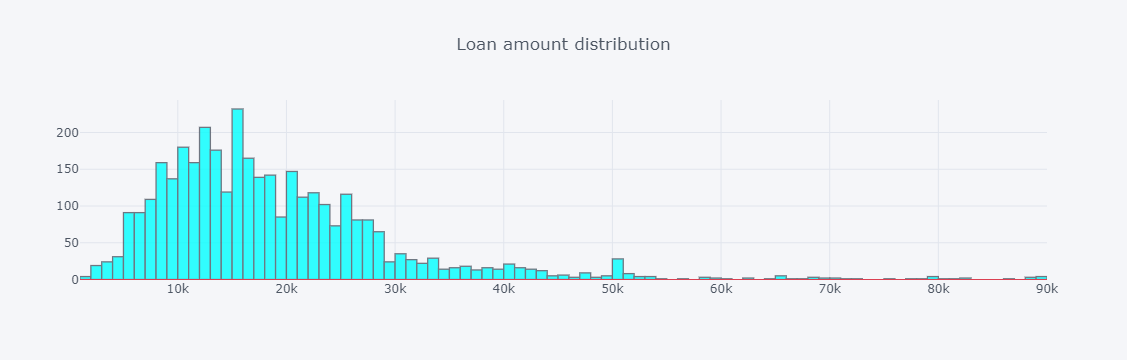

In [9]:
Train.LOAN.iplot(kind='hist', title = 'Loan amount distribution', hline=(0), color = ['cyan'])

### Target Variable

Let's see the distribution of the target column:

In [10]:
Train.BAD.value_counts()/Train.shape[0]*100,2

(0    80.033557
 1    19.966443
 Name: BAD, dtype: float64,
 2)

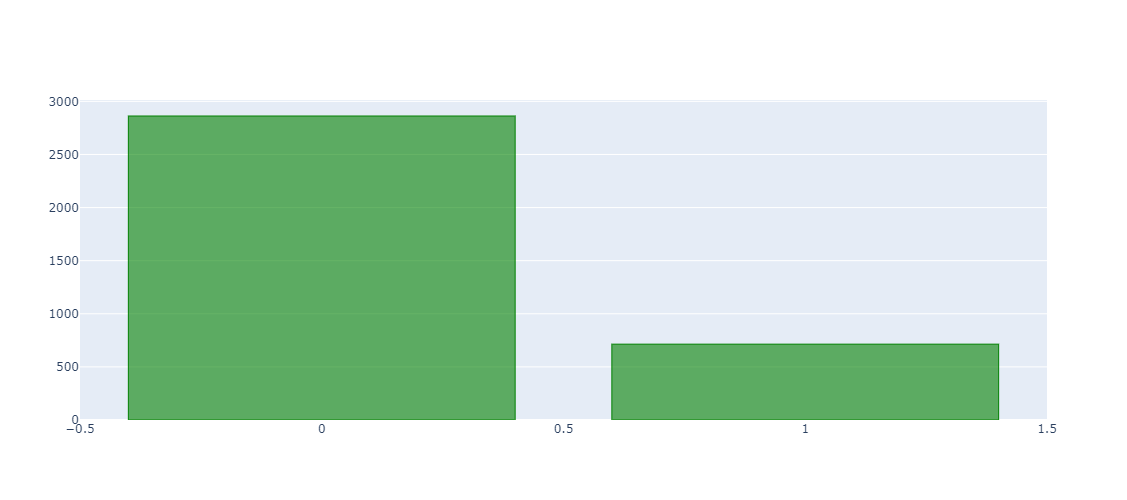

In [11]:
target_layout = cf.Layout(
    height=500,
    width=400
)
Train.BAD.value_counts().iplot(kind='bar',layout = target_layout, title = 'Default Flag distribution', hline=(0),colors=['green'])

### Numeric Variables

Now we will inspect the other numeric varaibles:

In [12]:
Floats = Train.select_dtypes(include = "float64").columns.tolist() #float variables
Train[Floats].describe()

,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,3258.000000,3506.000000,3270.000000,3160.000000,3227.000000,3392.000000,3273.000000,3448.000000,2815.000000
mean,73544.495743,101475.858454,8.914006,0.250949,0.456151,179.816590,1.230064,21.286253,33.885143
std,44151.080309,58649.192826,7.585691,0.840566,1.154058,85.878724,1.801399,10.182274,8.975487
min,2063.000000,9100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,46124.250000,65783.000000,3.000000,0.000000,0.000000,115.845740,0.000000,14.000000,29.160134
50%,65121.000000,89240.500000,7.000000,0.000000,0.000000,173.480399,1.000000,20.000000,34.883411
75%,91000.000000,118727.750000,13.000000,0.000000,0.000000,231.652609,2.000000,26.000000,39.090101
max,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,65.000000,203.312149


now we will visualize this data:

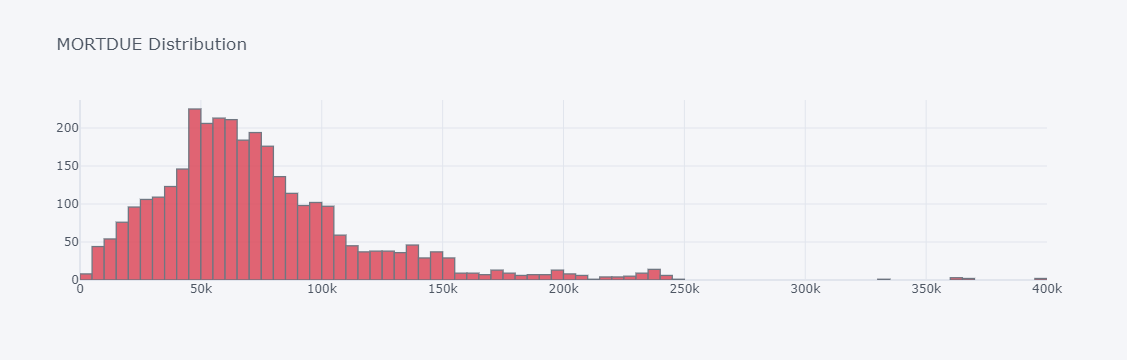

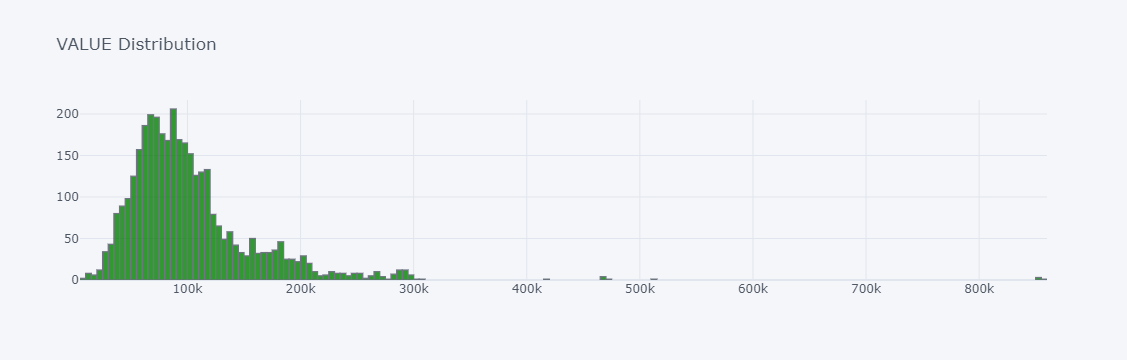

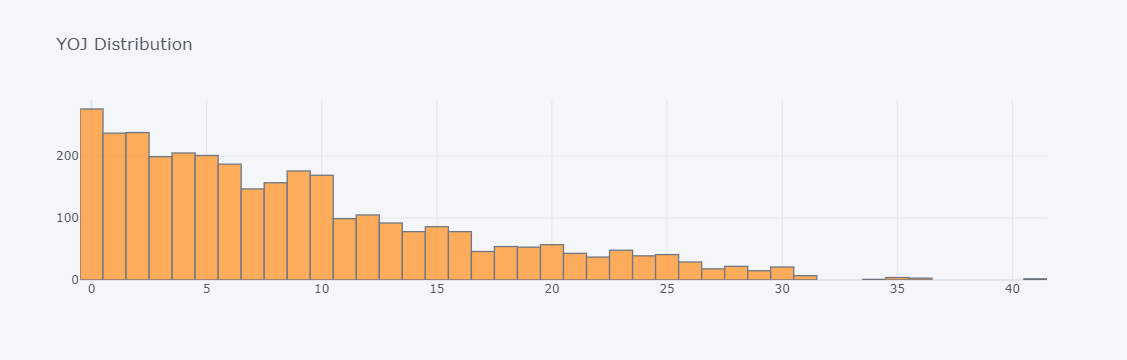

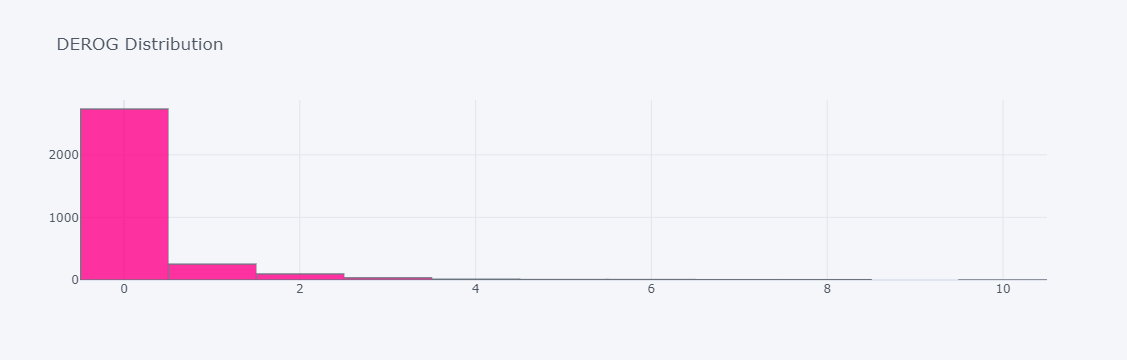

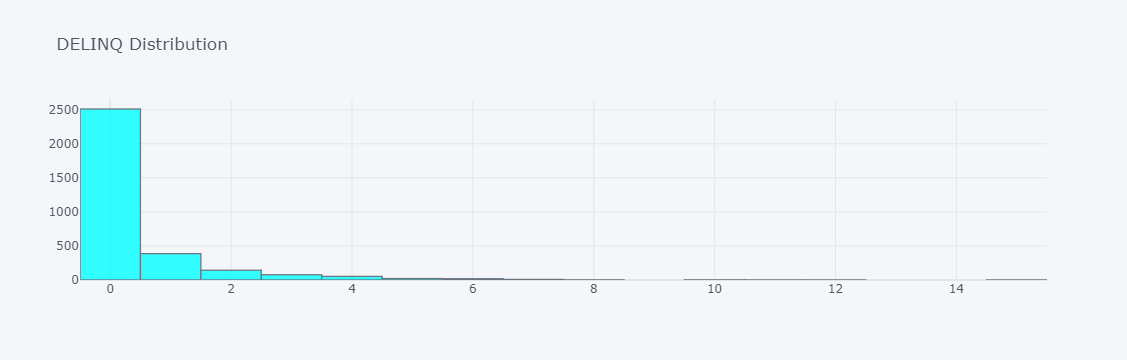

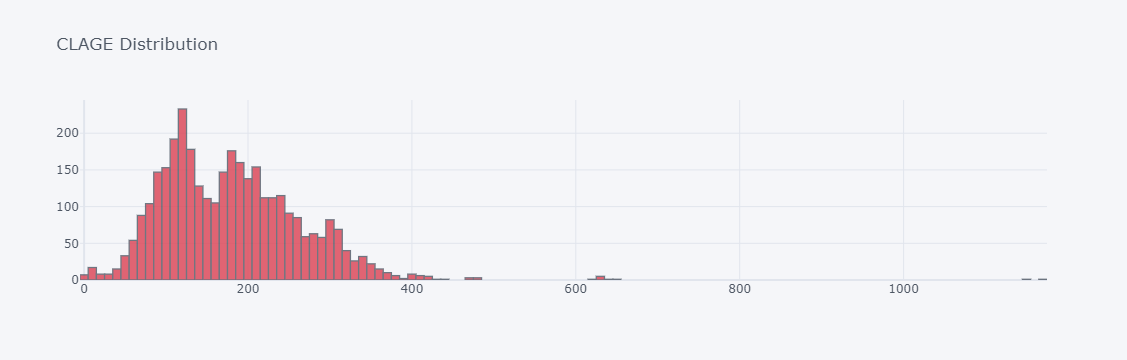

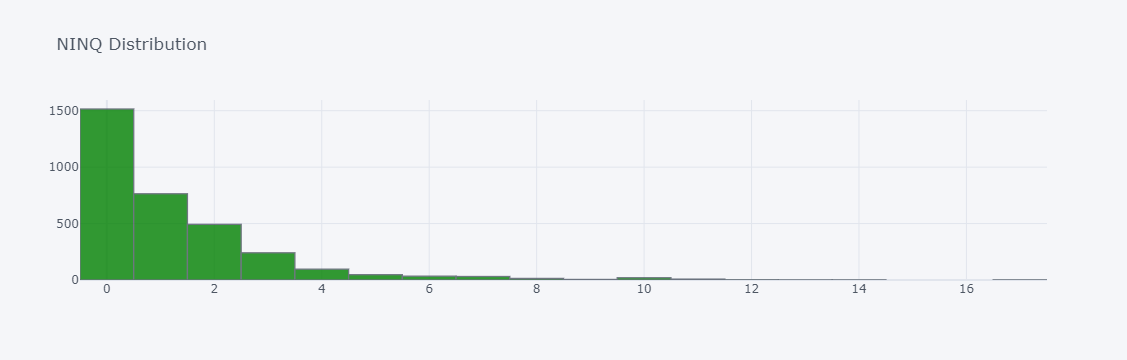

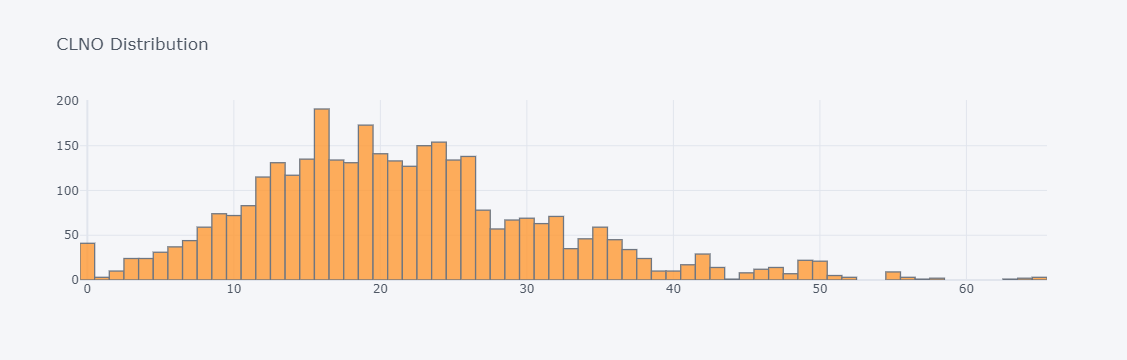

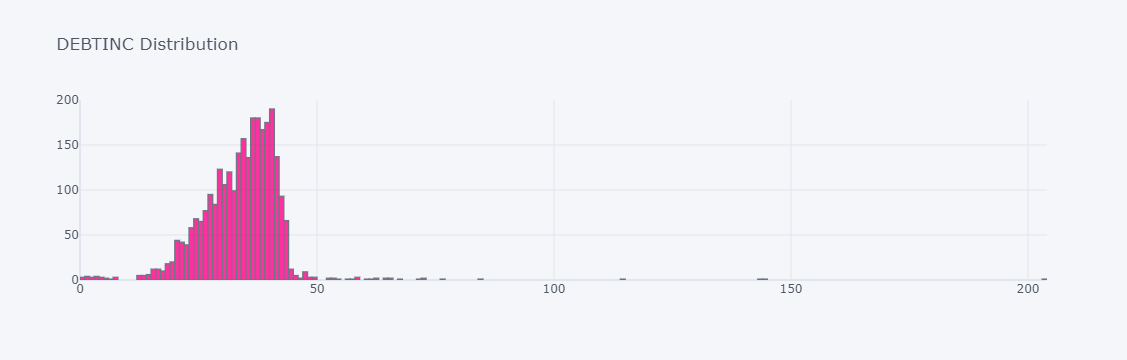

In [13]:
colors = ["red","green","orange","pink","cyan","red","green","orange","pink"]
for color,col in enumerate(Floats):    
    Train[col].iplot(kind='histogram',title = f"{col} Distribution",color = colors[color], filename='histogram-subplots')

### Categoric Variables

Now we will inspect categoric variables:

In [14]:
Cats = Train.select_dtypes(include = "object").columns.tolist()[::-1] #float variables
Train[Cats].describe(include = "object")

,JOB,REASON
count,3413,3423
unique,6,2
top,Other,DebtCon
freq,1438,2356


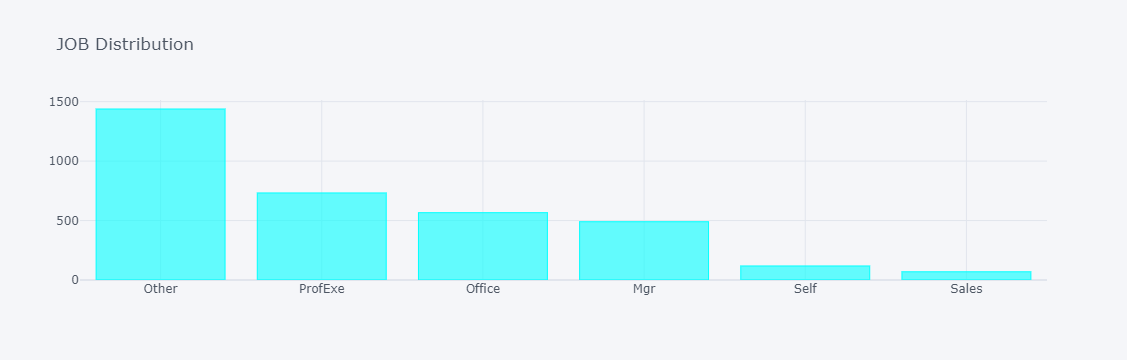

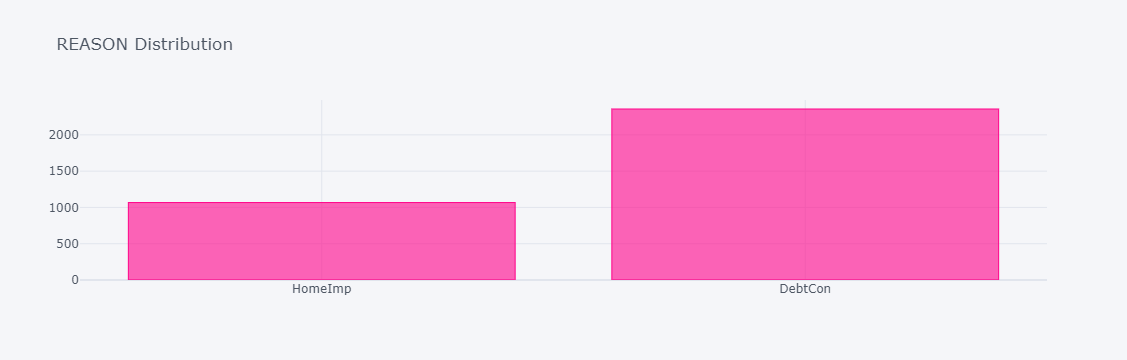

In [15]:
colors = ["cyan","pink"]
for i,col in enumerate(Cats):    
    Train[col].value_counts().sort_values(ascending = bool(i)).iplot(kind='bar',title = f"{col} Distribution",color = colors[i], filename='bar-subplots')

#### Insights so far:
1. Target variable:
    * **BAD** - Appears to be about 20-80 split in favor of the Loan paid category (0).
2. Inputs (Continuous):
    * **LOAN, MORTDUE, VALUE, CLAGE, DEBTINC** - Appears to be right skewd (mean>median>mode).
3. Inputs (Discrete):
    * **YOJ, DEROG, DELINQ, NINQ, CLNO** - Most of the data are in the lower values area in all these inputs.
4. Inputs (Nominal):
    * **JOB** - Alot of Jobs are classified as Other, the rest of the categories are significantly lower.
    * **REASON** - Most of the reasons for loan requests are for debt debt consolidation.


### Relation to target
Now an analysis of how the inputs are each distributed in relation to the targed `BAD`:

**LOAN**

In [16]:
Train[['LOAN','BAD']].groupby(['BAD']).describe()

LOAN                                                                 \
      count          mean           std     min      25%      50%      75%   
BAD                                                                          
0    2862.0  19004.227813  11172.611235  2000.0  11700.0  16600.0  23500.0   
1     714.0  17265.966387  11601.538019  1100.0   9500.0  15000.0  22375.0   

              
         max  
BAD           
0    89900.0  
1    77400.0

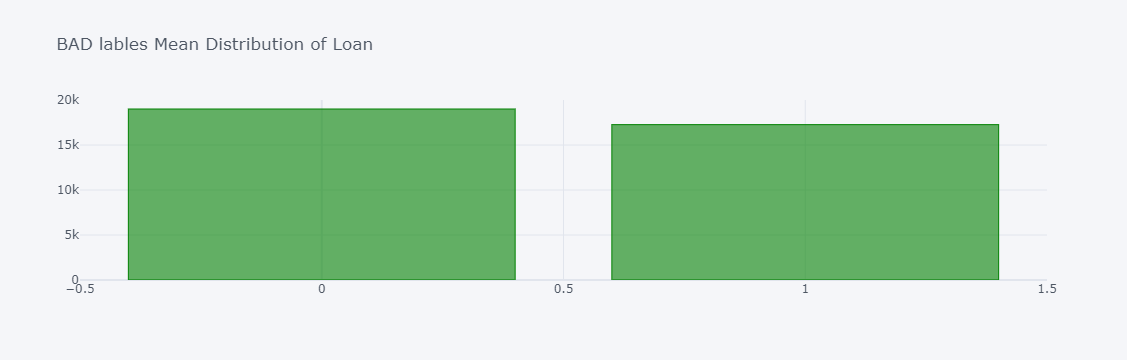

In [17]:
Train[['LOAN','BAD']].groupby(['BAD']).mean().iplot(kind='bar',title = "BAD lables Mean Distribution of Loan",color = ["green"])

### Continuous Variables

In [18]:
pd.set_option('display.max_columns', 32)#show all columns.
Continuous = ["MORTDUE", "VALUE", "CLAGE", "DEBTINC"]
Train[Continuous + ["BAD"]].groupby(['BAD']).describe()

MORTDUE                                                                 \
      count          mean           std     min      25%      50%      75%   
BAD                                                                          
0    2619.0  74612.342749  43559.622379  4810.0  47198.5  66812.0  92430.5   
1     639.0  69167.827027  46275.073498  2063.0  40668.0  60700.0  86794.5   

                VALUE                                                  \
          max   count           mean           std      min       25%   
BAD                                                                     
0    367089.0  2860.0  101829.176654  51961.569587  12414.0  67185.75   
1    399550.0   646.0   99911.632368  81981.231258   9100.0  60000.00   

                                    CLAGE                                   \
         50%        75%       max   count        mean        std       min   
BAD                                                                          
0    90630.0  118822.50  471827.0  2724.0  186.391995  83.112370  0.486711   
1    81961.0  117366.75  855909.0   668.0  153.003110  91.641166  0.000000   

                                                     DEBTINC             \
            25%         50%         75%          max   count       mean   
BAD                                                                       
0    119.708966  179.840098  240.249628   649.747104  2584.0  33.304531   
1     98.714488  134.149217  194.846772  1168.233561   231.0  40.379955   

                                                                      
           std       min       25%        50%        75%         max  
BAD                                                                   
0     6.956783  0.720295  28.93655  34.580713  38.823922   45.413178  
1    19.898634  0.524499  33.23546  38.345341  43.699232  203.312149

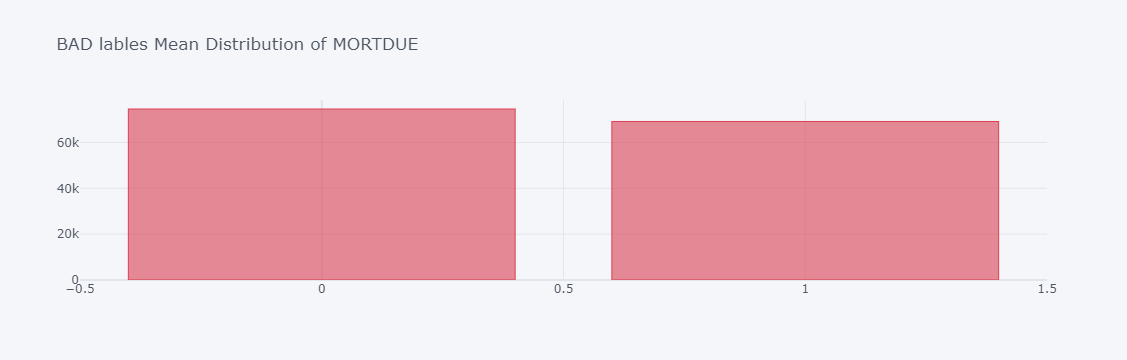

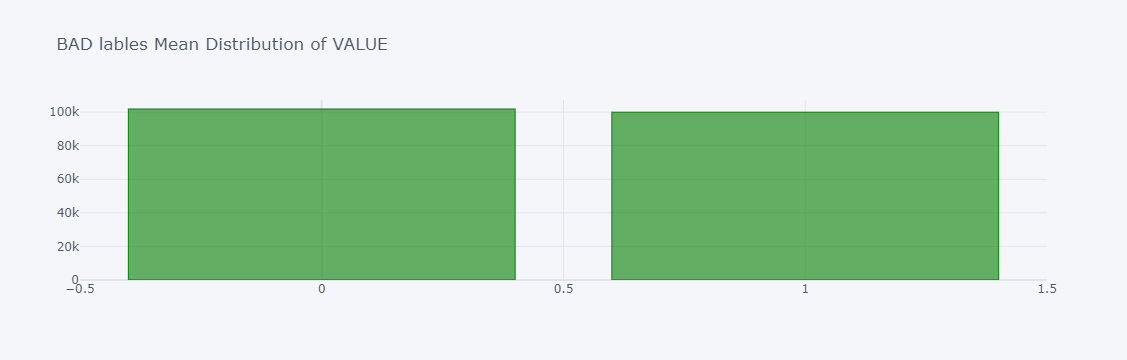

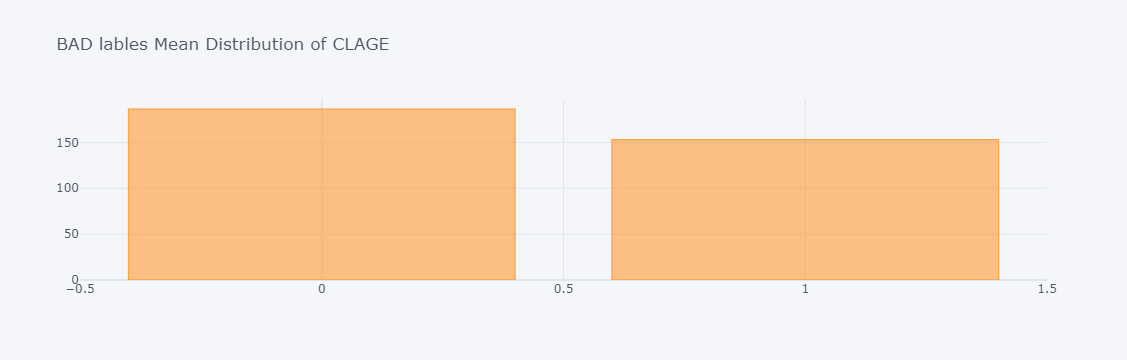

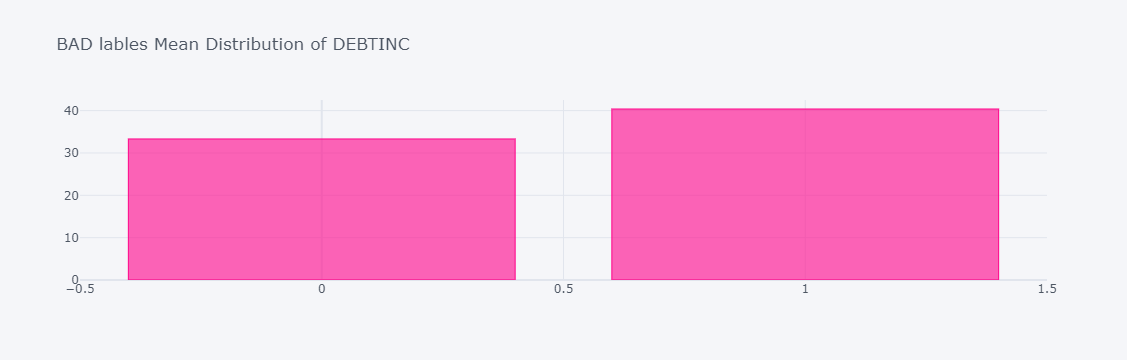

In [19]:
colors = ["red","green","orange","pink"]
for i,col in enumerate(Continuous):
    Train[[col,'BAD']].groupby(['BAD']).mean().iplot(kind='bar',title = f"BAD lables Mean Distribution of {col}",color = [colors[i]])

### Discrete Variables

In [20]:
pd.set_option('display.max_columns', 40)#show all columns.
Discrete = ["YOJ", "DEROG", "DELINQ", "NINQ", "CLNO"]
Train[Discrete + ["BAD"]].groupby(['BAD']).describe()

YOJ                                                  DEROG           \
      count      mean       std  min  25%  50%   75%   max   count     mean   
BAD                                                                           
0    2598.0  9.192879  7.674164  0.0  3.0  7.0  14.0  36.0  2500.0  0.13320   
1     672.0  7.835863  7.137078  0.0  2.0  5.0  12.0  41.0   660.0  0.69697   

                                         DELINQ                                \
          std  min  25%  50%  75%   max   count      mean       std  min  25%   
BAD                                                                             
0    0.509472  0.0  0.0  0.0  0.0   6.0  2556.0  0.248826  0.688669  0.0  0.0   
1    1.466569  0.0  0.0  0.0  1.0  10.0   671.0  1.245902  1.953346  0.0  0.0   

                       NINQ                                                \
     50%  75%   max   count      mean       std  min  25%  50%  75%   max   
BAD                                                                         
0    0.0  0.0   5.0  2604.0  1.065284  1.583009  0.0  0.0  1.0  2.0  11.0   
1    0.0  2.0  15.0   669.0  1.871450  2.369007  0.0  0.0  1.0  3.0  17.0   

       CLNO                                                     
      count       mean        std  min   25%   50%   75%   max  
BAD                                                             
0    2764.0  21.344428   9.779400  0.0  15.0  20.0  26.0  56.0  
1     684.0  21.051170  11.674528  0.0  13.0  20.0  27.0  65.0

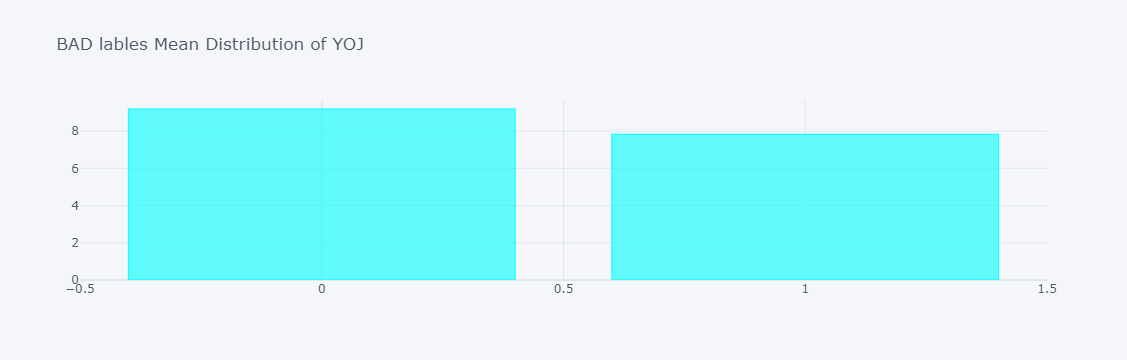

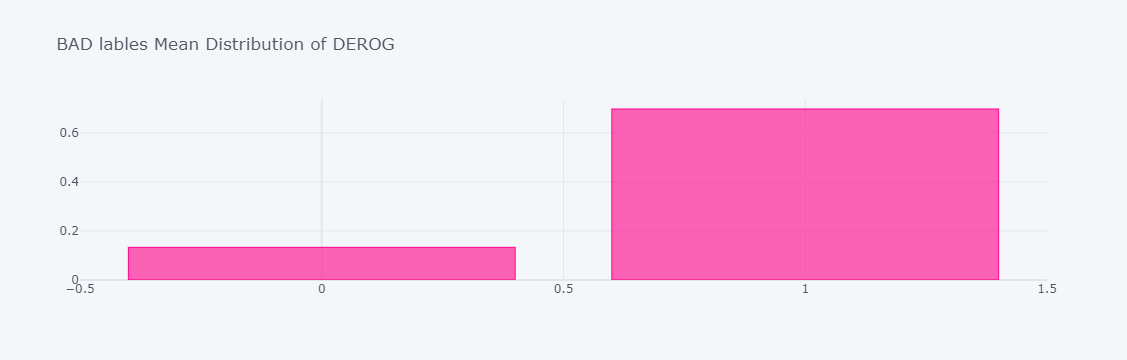

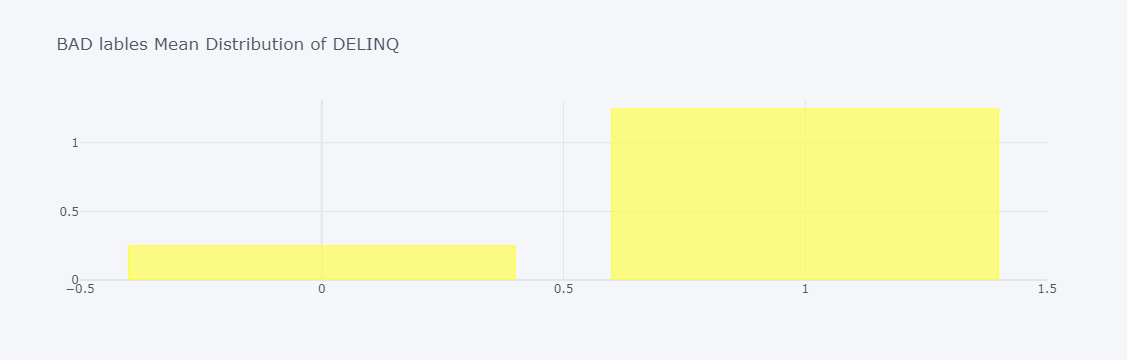

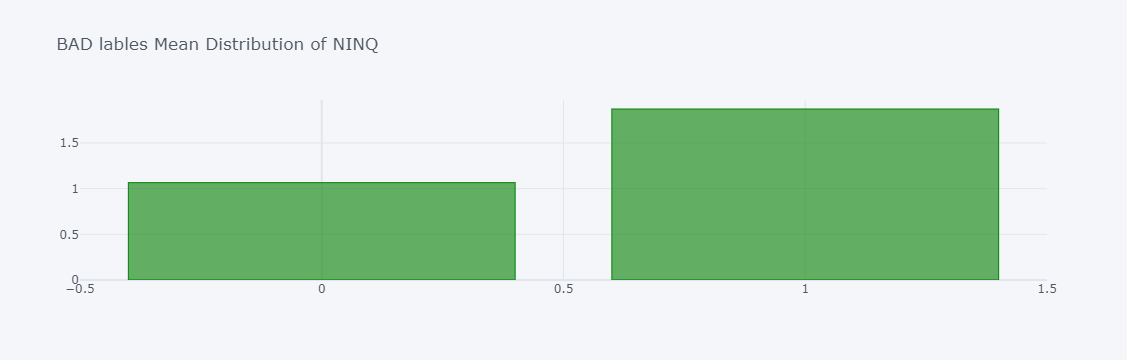

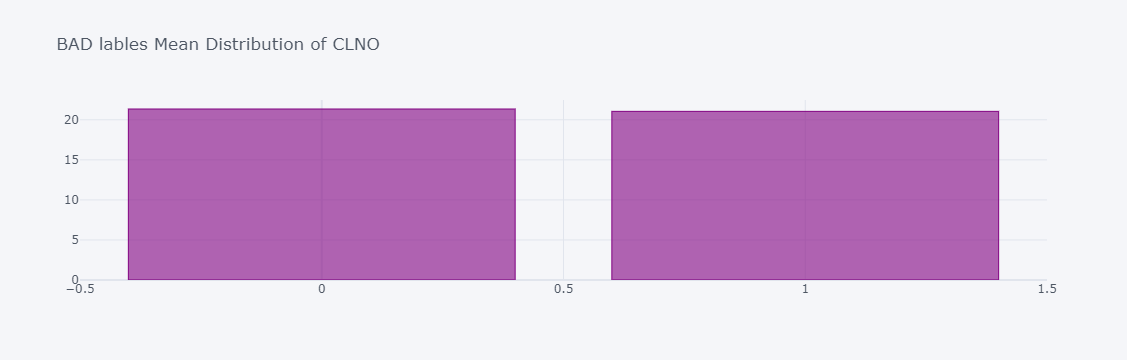

In [21]:
colors = ["purple","green","yellow","pink","cyan"][::-1]
for i,col in enumerate(Discrete):
    Train[[col,'BAD']].groupby(['BAD']).mean().iplot(kind='bar',title = f"BAD lables Mean Distribution of {col}",color = [colors[i]])

In [22]:
#DEROG
default_derog = Train[Train['BAD']==1]['DEROG'].value_counts().sort_values(ascending = False)
paid_derog = Train[Train['BAD']==0]['DEROG'].value_counts()
bad_derog = pd.DataFrame([default_derog,paid_derog])
bad_derog.index = ['Default','Paid']
bad_derog.fillna(0)

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,10.0
Default,458.0,95.0,50.0,25.0,10.0,4.0,5.0,6.0,6.0,1.0
Paid,2274.0,159.0,47.0,10.0,3.0,4.0,3.0,0.0,0.0,0.0


### Categoric (nominal) Variables

In [23]:
default_job = Train[Train['BAD']==1]['JOB'].value_counts().sort_values(ascending = False)
paid_job = Train[Train['BAD']==0]['JOB'].value_counts()
job_bad = pd.DataFrame([default_job,paid_job])
job_bad.index = ['Default','Paid']
job_bad

,Other,ProfExe,Mgr,Office,Self,Sales
Default,335,126,109,74,38,18
Paid,1103,606,381,492,80,51


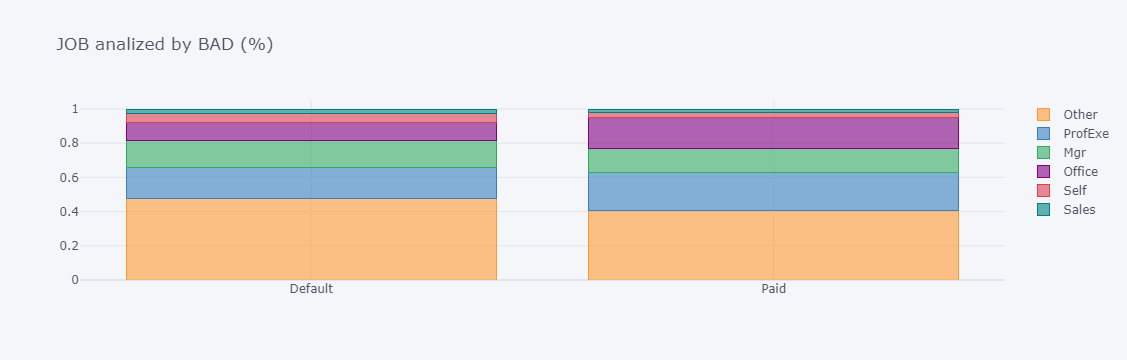

In [24]:
#normalize
default_job_n = Train[Train['BAD']==1]['JOB'].value_counts(normalize=True).sort_values(ascending = False)
paid_job_n = Train[Train['BAD']==0]['JOB'].value_counts(normalize=True)
job_bad_n = pd.DataFrame([default_job_n,paid_job_n])
job_bad_n.index = ['Default','Paid']
job_bad_n.iplot(kind='bar',barmode='stack',title = "JOB analized by BAD (%)")

In [25]:
default_reason = Train[Train['BAD']==1]['REASON'].value_counts().sort_values(ascending = False)
paid_reason = Train[Train['BAD']==0]['REASON'].value_counts()
reason_bad = pd.DataFrame([default_reason,paid_reason])
reason_bad.index = ['Default','Paid']
reason_bad = reason_bad.T
reason_bad

,Default,Paid
DebtCon,437,1919
HomeImp,250,817


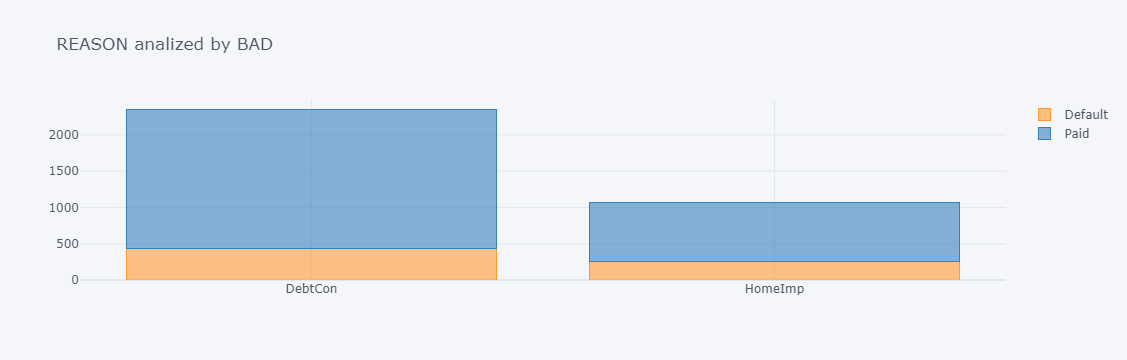

In [26]:
reason_bad.iplot(kind='bar',barmode='stack',title = "REASON analized by BAD")

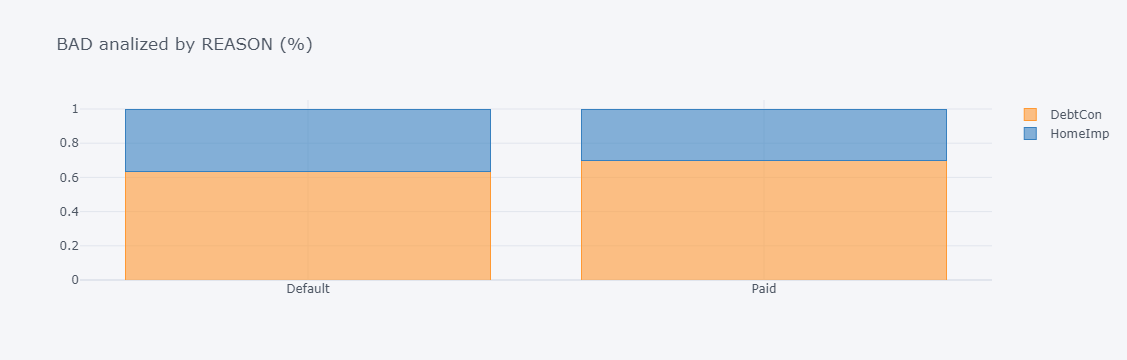

In [27]:
default_reason_n = Train[Train['BAD']==1]['REASON'].value_counts(normalize=True).sort_values(ascending = False)
paid_reason_n = Train[Train['BAD']==0]['REASON'].value_counts(normalize=True)
reason_bad_n = pd.DataFrame([default_reason_n,paid_reason_n])
reason_bad_n.index = ['Default','Paid']
reason_bad_n.iplot(kind='bar',barmode='stack',title = "BAD analized by REASON (%)")

#### Insights:
1. Inputs (Continuous):
    * **LOAN** - Defaulters on average takes a smaller loan than none defaulters.
    * **MORTDUE** - Defaulters on average have smaller amount due on existing mortgage.
    * **VALUE** - Defaulters house value is smaller on average.
    * **CLAGE** - Defaulters average credit traidline is higher on average than none defaulters.
    * **DEBTINC** - Defaulters Debt to income ratio is smaller on average than none defaulters.
2. inputs (Discrete):
    * **YOJ** - Defaulters on average have less years of expirience in the current job their in.
    * **DEROG** - Dost of the loan owners dont have any derogatory mark but the ones who do are mostly defaulters 
    * **DELINQ** - Most of the loan owners dont have any delinq credit lines but the ones who do are mostly defaulters.
    * **NINQ** - Defaulters on average have more recent credit lines then none defaulters.
    * **CLNO** - Defaulters on average have about the same amount of credit lines then none defaulters.
    
3. inputs (Nominal):
    * **JOB** - Jobs like Mgr and self have more defaulters than the original distribution.
    * **REASON** - Home improvement have a slighly higher default rate than debt consolidation.


 # Conclusion for EDA
 
 The data is not optimal for making classifications right away.
 In the predictions notebook, the data will go through preprocessing and feature engineering based on insights from this analysis
 and predictions will be made with a few baselines for comparison between a few models.